In [84]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [85]:
ruta = '/Users/ferleon/Documents/GitHub/semestre_IV/graphic_visualization/clases/datos/'
archivo1 = 'escolaridad_gto.csv'
archivo2 = 'gto.geojson'


municipios = gpd.read_file(ruta + archivo2)
print(municipios.columns)
escolaridad =  pd.read_csv(ruta + archivo1)
print(escolaridad.columns)




Index(['id', 'state_code', 'mun_code', 'mun_name', 'geometry'], dtype='object')
Index(['num', 'municipio', 'grado_escolaridad'], dtype='object')


In [86]:
merge = municipios.merge(escolaridad, left_on='mun_code',right_on='num')

In [87]:
print(merge.columns, merge.shape)

Index(['id', 'state_code', 'mun_code', 'mun_name', 'geometry', 'num',
       'municipio', 'grado_escolaridad'],
      dtype='object') (46, 8)


Text(0.5, 1.0, 'Grado de escolaridad en Guanajuato')

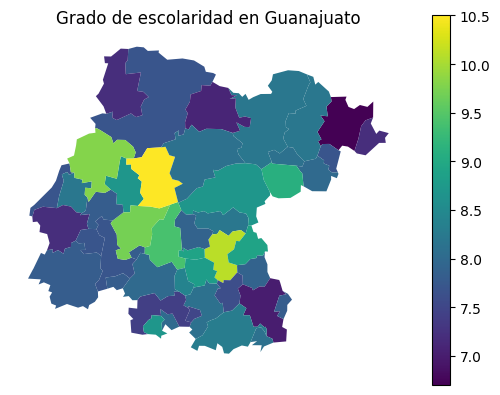

In [88]:
#import matplotlib.pyplot as plt
fig, ax = plt.subplots()

merge.plot(
    ax=ax,
    column='grado_escolaridad',
    legend=True,
    cmap='viridis',
)
ax.axis('off')
ax.set_title('Grado de escolaridad en Guanajuato')

In [89]:
import plotly.express as px

fig = px.choropleth(
    escolaridad,
    geojson=municipios,
    locations="num",
    featureidkey="properties.mun_code",
    color='grado_escolaridad',
    title='Grado de escolaridad en Guanajuato',
    color_continuous_scale='viridis',
    hover_name='municipio',
)
fig.update_geos(fitbounds="locations", visible=False)



In [90]:
pobreza = pd.read_csv(ruta + 'pobreza.csv')

print(pobreza.head())

               Municipio  2010  2015  2020  2025
0                Abasolo  66.7  55.8  44.9  34.0
1               Acámbaro  56.5  52.9  49.3  45.7
2  San Miguel de Allende  60.6  48.6  36.6  24.6
3         Apaseo el Alto  57.2  51.7  46.2  40.7
4       Apaseo el Grande  52.1  41.9  31.7  21.5


In [91]:
pobreza_merged = municipios.merge(pobreza, left_on='mun_name', right_on='Municipio')

In [92]:
import plotly.express as px

fig = px.choropleth(
    pobreza,
    geojson=municipios,
    locations="Municipio",
    featureidkey="properties.mun_name",
    color='2010',
    title='Grado de pobreza en Guanajuato',
    color_continuous_scale='viridis',
    hover_name='2010',
)
fig.update_geos(fitbounds="locations", visible=False)



In [93]:

# HECHO POR CHAT

from plotly.subplots import make_subplots

import plotly.graph_objects as go

years = ['2010', '2015', '2020', '2025']

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=years,
    specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}],
           [{'type': 'choropleth'}, {'type': 'choropleth'}]]
)

# Add a choropleth trace for each year
for i, year in enumerate(years):
    row = i // 2 + 1
    col = i % 2 + 1
    trace = go.Choropleth(
        geojson=municipios.__geo_interface__,
        locations=pobreza['Municipio'],
        z=pobreza[year],
        featureidkey="properties.mun_name",
        colorscale='viridis',
        marker_line_width=0.5,
        colorbar_title=year
    )
    fig.add_trace(trace, row=row, col=col)

# Update each geo subplot to remove frame and fit bounds
for geo in fig.layout:
    if geo.startswith('geo'):
        fig.layout[geo].update(fitbounds="locations", visible=False)

fig.update_layout(title_text="Pobreza en Guanajuato por Año", height=800)
fig.show()


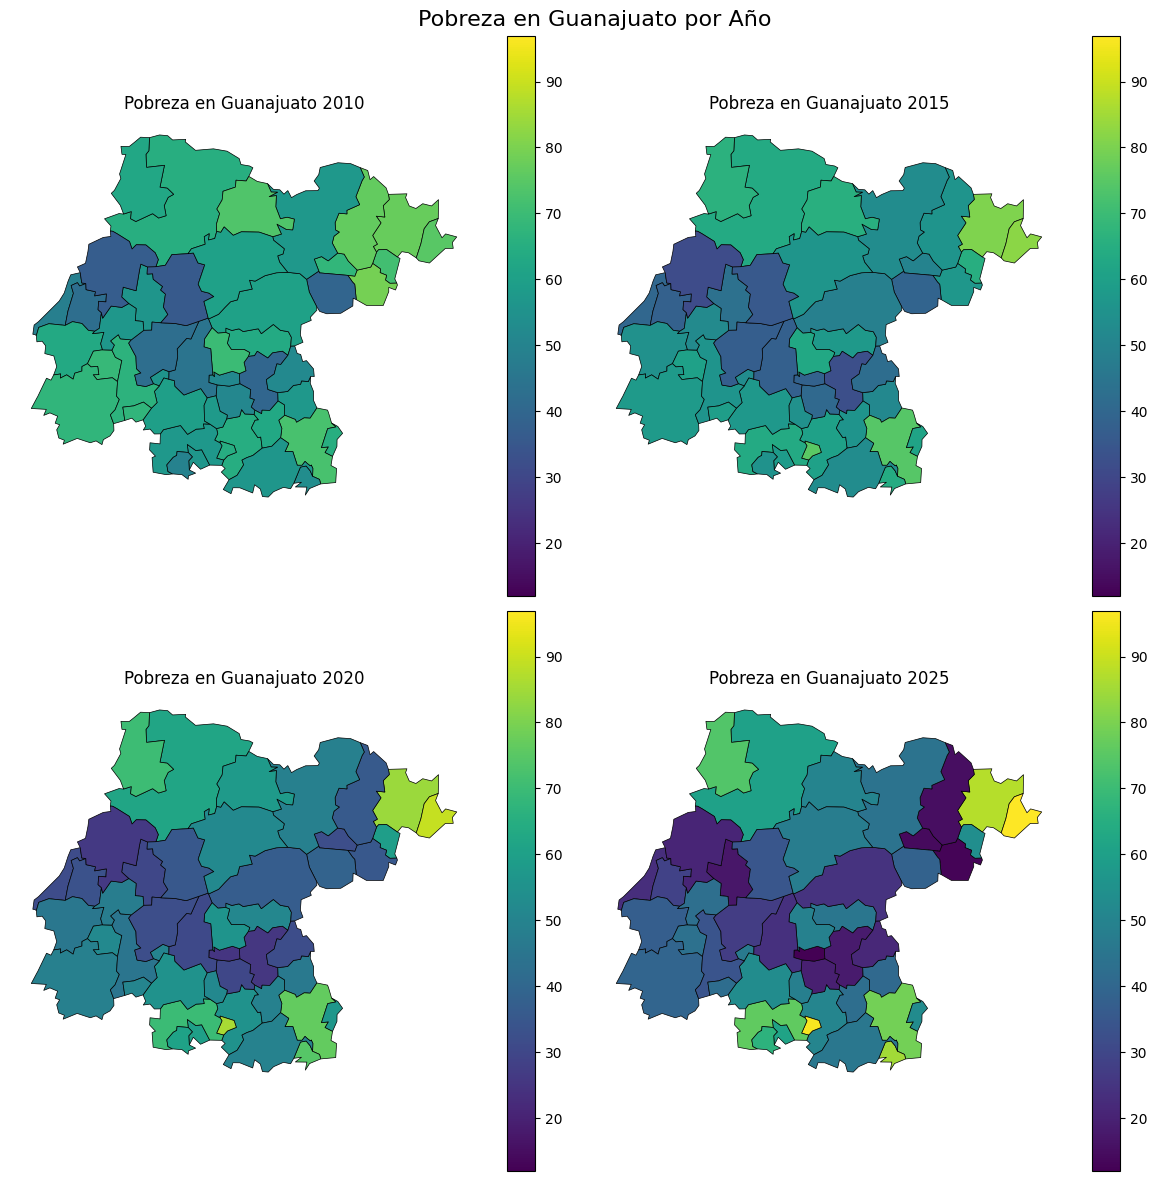

In [94]:
# HECHO CON CHAT
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
years = ['2010', '2015', '2020', '2025']
vmin,vmax = pobreza[years].min().min(), pobreza[years].max().max()
axs = axs.flatten()

for ax, year in zip(axs, years):
    pobreza_merged.plot(
        column=year,
        cmap='viridis',
        linewidth=0.5,
        edgecolor='k',
        legend=True,
        ax=ax,
        vmin=vmin, vmax=vmax,
    )
    ax.set_title(f"Pobreza en Guanajuato {year}")
    ax.axis('off')

plt.suptitle("Pobreza en Guanajuato por Año", fontsize=16)
plt.tight_layout()
plt.show()

In [98]:

pobreza_merged = municipios.merge(pobreza, left_on='mun_name', right_on='Municipio')

poblacion_melt = pobreza_merged.melt(
    id_vars=['mun_name', 'geometry'],
    value_vars=['2010', '2015', '2020', '2025'],
    var_name='año',
    value_name='pobreza'
)

poblacion_melt.head()

mun_name                                           geometry  \
0            Comonfort  POLYGON ((-100.86051 20.66103, -100.85196 20.6...   
1               Celaya  POLYGON ((-100.63514 20.66685, -100.67603 20.6...   
2  Purísima del Rincón  POLYGON ((-101.78577 21.04877, -101.82095 21.0...   
3           San Felipe  POLYGON ((-101.04056 21.32594, -101.05165 21.2...   
4                Xichú  POLYGON ((-100.11879 21.22864, -100.13052 21.2...   

    año  pobreza  
0  2010     63.6  
1  2010     39.6  
2  2010     48.3  
3  2010     65.2  
4  2010     77.2

In [99]:
import plotly.express as px


fig = px.choropleth(
    poblacion_melt,
    geojson=poblacion_melt.geometry,
    locations=poblacion_melt.index,
    color='pobreza',
    animation_frame='año',
    color_continuous_scale='viridis',
    range_color=[poblacion_melt['pobreza'].min(), poblacion_melt['pobreza'].max()],
    hover_name='mun_name',
    projection='mercator',
)
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(
    title_text='Pobreza en Guanajuato por Año',
    title_x=0.5,
)